
Equation $$\frac{1}{\alpha} \frac{\partial T^*}{\partial t^*}=\frac{\partial^2 T^*}{\partial x^* ^2}$$
where $$\alpha=\frac{k}{\rho c}$$ $$0\le x^*\le L$$
At eastern boundary we have a heat transfer rate $$\dot Q = hA_{wall}(T^*_{wall} − T_\infty)$$
The western boundary is considered insulated.

### 1. Defining boundary conditions

The fluid initially has the temperature $T_i$ $$T^* \biggr| _{t^*=0}=T_i$$
Because the western boundary is considered insulated, we can write $$\frac{\partial T^*}{\partial x^*} \biggr| _{x^*=0}=0$$
This means that no temperature passes through the wall.
From the heat transfer rate $\dot Q$ we can obtain the heat flux q: $$q=\frac{d\dot Q}{dA_{wall}}=h(T^*_{wall} − T_\infty)$$
On the western side $x^*=L$ there is a heat flow. Taking into account thermal conductivity (and the fact that the direction of the heat flow vector is opposite to the grad $T$), we can write: $$k\frac{\partial T^*}{\partial x^*}\biggr| _{x^*=L}+q=0$$

### 2. Defining non-dimensional parameters

We can define non-dimensional parameters, such as the temperature becomes: $$T=\frac{T^*-T_\infty}{T_i-T_\infty}$$
The Nusselt number: $$Nu=\frac{hL}{k}$$
$$x=\frac{x^*}{L}$$
$$t=\frac{\alpha t^*}{L^2}$$

Substituting new variables into previous ones:$$T^*=T(T_i-T_\infty)+T_\infty$$ $$t^*=\frac{tL^2}{\alpha}$$ $$x^*=xL$$
we can obtain $$\frac{1}{\alpha} \frac{\partial T^*}{\partial t^*}=\frac{\partial^2 T^*}{\partial x^* ^2}$$
$$\frac{1}{\alpha} \frac{\partial \left(T(T_i-T_\infty)+T_\infty\right)}{\partial \left(\frac{tL^2}{\alpha}\right)}=\frac{\partial^2 \left(T(T_i-T_\infty)+T_\infty\right)}{\partial \left(xL^2\right)}$$
$$\frac{1}{L^2} \frac{\partial T}{\partial t} (T_i-T_\infty)=\frac{1}{L^2}\frac{\partial^2 T}{\partial x^2} (T_i-T_\infty)$$
$$\frac{\partial T}{\partial t}=\frac{\partial^2 T}{\partial x^2}$$

Assuming $T_i-T\infty\ne 0$, $\alpha \ne 0,\alpha \ne \infty$ and $L\ne 0, L\ne \infty$
Transforming initial conditions: $$T^*\biggr| _{t=0}=T_i$$
$$\left(T(T_i-T_\infty)+T_\infty\right)\biggr| _{t=0}=T_i \rightarrow T(T_i-T_\infty)\biggr| _{t=0}=T_i-T_\infty$$
Thus $$T\biggr| _{t=0}=1$$

Transforming boundary conditions: $$\frac{\partial T^*}{\partial x^*} \biggr| _{x^*=0}=\frac{\partial \left(T(T_i-T_\infty)+T_\infty\right)}{\partial (xL)} \biggr| _{xL=0}=\frac{\partial T}{\partial x}\frac{T_i-T\infty}{L} \biggr| _{x=0}=0$$
We obtain $$\frac{\partial T}{\partial x} \biggr| _{x=0}=0$$
The second one: $$k\frac{\partial T^*}{\partial x^*}\biggr| _{x^*=L}+q=\frac{\partial (T(T_i-T_\infty)+T_\infty)}{\partial (xL)}\biggr| _{x=1}+ h(T^*_{wall} − T_\infty)=0$$
$$T^*_{wall}=T_{wall}(T_i-T_\infty)+T_\infty$$
$$\frac{k}{L}\frac{\partial T(T_i-T_\infty)}{\partial x}\biggr| _{x=1}=-h(T_{wall}(T_i-T_\infty)+T_\infty-T_\infty)$$
$$\frac{\partial T}{\partial x}\biggr| _{x=1}=-\frac{Lh}{k}T_{wall}=-NuT_{wall}$$

### 3. Discretization of the equation
![picture](picture.jpg)
![discretization_scheme](discretization_scheme.jpg)

### 4. Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# There were some troubles with the descritization of the Neuman boundary condition, so there is Dirichlet condition for now  

In [275]:
def central_dif_implicit_solve(dx, dt, nx, t,TL,T0t):
    sol=np.array([[]])
    for j in np.arange(0,t+dt,dt):
        M=np.zeros((nx, nx))
        S=np.zeros(nx)
        
        aWL=1/dx
        aEL=0
        aPL0=dx/dt
        SPL=2/dx
        SuL=-2*TL/dx
        # SPL=-2*TL/dx # This is Dirichlet 
        # SuL=0
        aPL=aWL+aEL+aPL0-SPL
        M[nx - 1, nx - 1]= aPL
        M[nx-1,nx-2]=-aWL
        S[-1]=SuL+aPL0*(T0t if j==0 else sol[-1][-1])
        
        # aWL=1/dx
        # aEL=0
        # # aEL=2*TL/dx
        # aPL0=dx/dt
        # SPL=0
        # SuL=TL
        # aPL=aWL+aEL+aPL0-SPL
        # M[nx - 1, nx - 1]= aPL
        # M[nx-1,nx-2]=-aWL
        # S[-1]=SuL+aPL0*(T0t if j==0 else sol[-1][-1])
        
        
        # aEL=0
        # aWL=0
        # aPL0=dx/dt
        # SPL=0
        # SuL=TL
        # aPL=aWL+aEL+aPL0-SPL
        # M[nx - 1, nx - 1]= aPL
        # M[nx-1,nx-2]=-aWL
        # S[-1]=SuL+aPL0*(T0t if j==0 else sol[-1][-1])
        
        
        aW0=0
        aE0=1/dx
        aP00=dx/dt
        SP0=0
        Su0=0
        aP0=aW0+aE0+aP00-SP0
        M[0,0]=aP0
        M[0,1]=-aE0
        S[0]=Su0+aP00*(T0t if j==0 else sol[-1][0])
        

         

        for i in range(1, nx - 1):
            aW=1/dx
            aE=1/dx
            aP0=dx/dt
            Sp=0
            Su=0
            aP=aW+aE+aP0-Sp
            M[i,i]=aP
            M[i,i-1]=-aW
            M[i,i+1]=-aE
            S[i]=Su+aP0*(T0t if j==0 else sol[-1][i])
            
        if j==0:
            sol=[(np.linalg.solve(M,S))]
        else:
            sol=np.append(sol,[(np.linalg.solve(M,S))],axis=0)
        print("time=", j)
    return sol

In [276]:
nx=400
startpoint=0
L=1
t=4
Nu=10
T_wall=0.0012
# T_wall=-0.012
# T_wall=-0.0008
# T_wall=0.1
T0t=1

dt=0.5
dx=(L-startpoint)/nx
x=np.linspace(startpoint + dx / 2, L - dx / 2, nx)

solution=central_dif_implicit_solve(dx,dt,nx,t,-Nu*T_wall,T0t)
print(solution.shape)

time= 0.0
time= 0.5
time= 1.0
time= 1.5
time= 2.0
time= 2.5
time= 3.0
time= 3.5
time= 4.0
(9, 400)


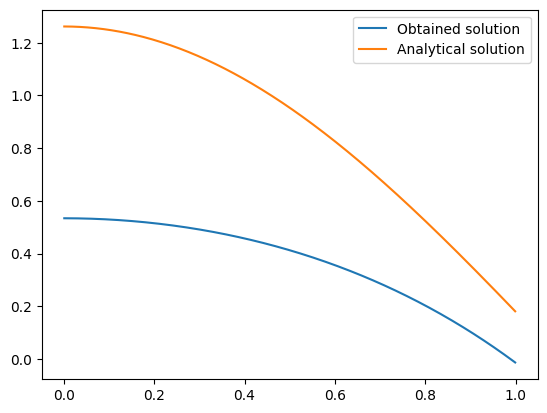

In [277]:
A1=1.262
L1=1.4289
# t_0=0.2
# t_0=2
t_0=0
T_analytical=A1*np.exp(-L1*L1*t_0)*np.cos(L1*x)
plt.plot(x,solution[int((solution.shape[0]-1)*t_0/t)],label="Obtained solution")
plt.plot(x,T_analytical,label="Analytical solution")
plt.legend()
plt.show()

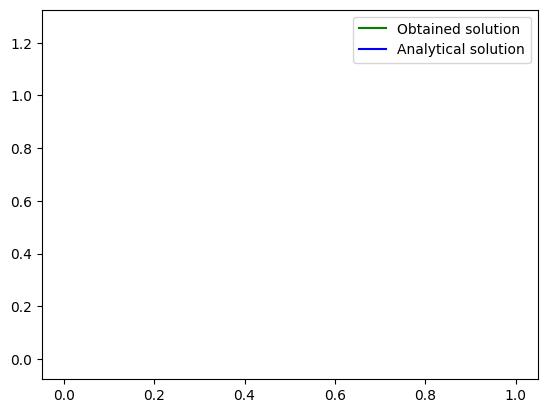

In [278]:
fig, ax = plt.subplots()
# scat = ax.scatter()

artists=[]
for i in np.arange(0,t,dt):
    T_analytical=A1*np.exp(-L1*L1*i)*np.cos(L1*x)
    c=ax.plot(x,solution[int((solution.shape[0]-1)*i/t)],color='g')
    c=c+ax.plot(x,T_analytical,color="b")
    artists.append(c)
    # plt.legend()
    
T_analytical=A1*np.exp(-L1*L1*t)*np.cos(L1*x)
c=ax.plot(x,solution[int((solution.shape[0]-1)*t/t)],label="Obtained solution",color='g')
c=c+ax.plot(x,T_analytical,label="Analytical solution",color="b")
artists.append(c)
ax.legend()

# ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
# plt.show()
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)

ani.save(filename="plot.gif", writer="pillow")

### 5. A flux case
$$\frac{\partial T}{\partial t}+u\frac{\partial T}{\partial x}=\frac{\partial^2 T}{\partial x^2}$$
$$u=\pm 200$$
In the western boundary, where the temperature increasing, we left the previous condition:
$$\frac{\partial T}{\partial x}\biggr| _{x=1}=-NuT_{wall}$$
We still have insulated western boundary, but now the flux goes throw it and we can't ignore the convection. So, taking into account non-dimensional velocity we can define the eastern boundary condition as $$\frac{\partial T}{\partial x}\biggr| _{x=0}=u$$
It means there should be no diffusion throw the western boundary

The steady temperature means that the temperature does not changes over time: $\frac{\partial T}{\partial x}=0$
So the equation becomes $$u\frac{\partial T}{\partial x}=\frac{\partial^2 T}{\partial x^2}$$

In [279]:
#System of linear equations
def upwind_steady_solve(dx, nx,u,TL):
    S=np.zeros(nx)
    M=np.zeros((nx, nx))
    
    D=1/dx
    F=u
    
    for i in range(1, nx - 1):
        aW= D + max(F, 0)
        aE= D + max(0, -F)
        Sp=0
        aP=aW+aE-Sp #Fe=Fw=F => Fe-Fw=0
        M[i,i-1]=-aW
        M[i,i]=aP
        M[i,i+1]=-aE
        S[i]=0
        
        
    # #Boundaries
    aE= D + max(0, -F)
    Sp=-(max(0,F))
    M[0][0]=aE-Sp
    M[0][1]=-aE
    S[0]=  (max(0, F))#??????????????????????????
    # 
    #     #Boundaries
    # aE= D+ max(0, -F)
    # Sp=D
    # M[0][0]=aE-Sp
    # M[0][1]=-aE
    # S[0]=  max(0, F)#??????????????????????????
    
    
    aW= D + max(F, 0)
    Sp=-(2 * D+ max(0,-F))
    M[nx - 1][nx - 2]=-aW
    M[nx - 1][nx - 1]= aW -Sp
    S[nx - 1]=  (2 * D + max(0, -F)) * TL
    
    
    return np.linalg.solve(M,S)

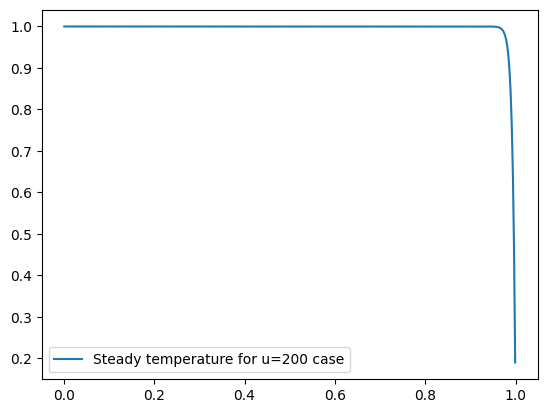

In [280]:
# dt=0.1
u=200

solution=upwind_steady_solve(dx,nx,u,-Nu*T_wall)
plt.plot(x,solution,label="Steady temperature for u=200 case")
plt.legend()
plt.show()

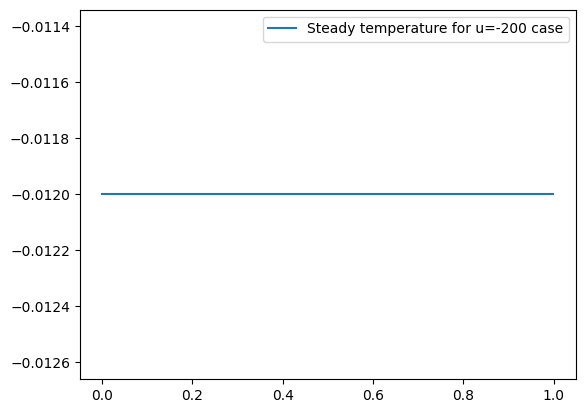

In [281]:
# dt=0.1
u=-200

solution=upwind_steady_solve(dx,nx,u,-Nu*T_wall)
plt.plot(x,solution,label="Steady temperature for u=-200 case")
plt.legend()
plt.show()

### 6. Discretization of the equation 

Combining upwind coefficients with the previous one

# For now it starts from t=0

In [283]:
#System of linear equations
def upwind_solve(dx, dt, nx,u, t,TL,T0t):
    
    sol=np.array([[]])
    for j in np.arange(0,t+dt,dt):
        
        S=np.zeros(nx)
        M=np.zeros((nx, nx))
        
        D=1/dx
        F=u
        aP0=dx/dt
        
        for i in range(1, nx - 1):
            aW= D + max(F, 0)
            aE= D + max(0, -F)
            Sp=0
            aP=aW+aE+aP0-Sp #Fe=Fw=F => Fe-Fw=0
            M[i,i-1]=-aW
            M[i,i]=aP
            M[i,i+1]=-aE
            S[i]= aP0*(T0t if j==0 else sol[-1][i])
            
            
        #Boundaries
        aE= D + max(0, -F)
        Sp=-(max(0,F))
        M[0][0]=aE-Sp+aP0
        M[0][1]=-aE
        S[0]=  (max(0, F)) +aP0*(T0t if j==0 else sol[-1][0])
        
        aW= D + max(F, 0)
        Sp=-(2 * D+ max(0,-F))
        M[nx - 1][nx - 2]=-aW
        M[nx - 1][nx - 1]= aW -Sp+aP0
        S[nx - 1]=  (2 * D + max(0, -F)) * TL+aP0*(T0t if j==0 else sol[-1][0])
        
        
        
        if j==0:
            sol=[(np.linalg.solve(M,S))]
        else:
            sol=np.append(sol,[(np.linalg.solve(M,S))],axis=0)
        print("time=", j)
        
    return sol

In [284]:
u=200
dt=0.1
nx=400


solution=upwind_solve(dx,dt,nx,u,t,-Nu*T_wall,T0t)
print(solution.shape)

time= 0.0
time= 0.1
time= 0.2
time= 0.30000000000000004
time= 0.4
time= 0.5
time= 0.6000000000000001
time= 0.7000000000000001
time= 0.8
time= 0.9
time= 1.0
time= 1.1
time= 1.2000000000000002
time= 1.3
time= 1.4000000000000001
time= 1.5
time= 1.6
time= 1.7000000000000002
time= 1.8
time= 1.9000000000000001
time= 2.0
time= 2.1
time= 2.2
time= 2.3000000000000003
time= 2.4000000000000004
time= 2.5
time= 2.6
time= 2.7
time= 2.8000000000000003
time= 2.9000000000000004
time= 3.0
time= 3.1
time= 3.2
time= 3.3000000000000003
time= 3.4000000000000004
time= 3.5
time= 3.6
time= 3.7
time= 3.8000000000000003
time= 3.9000000000000004
time= 4.0
(41, 400)


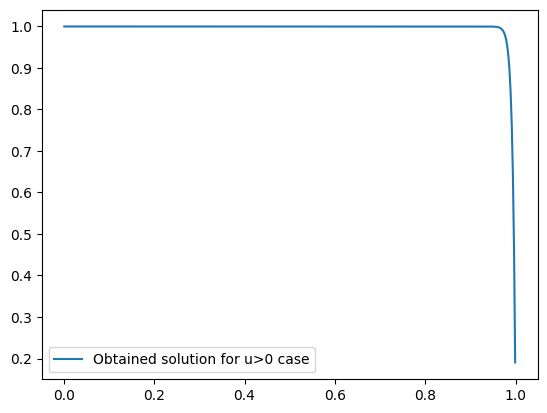

In [285]:
t_0=2
plt.plot(x,solution[int((solution.shape[0]-1)*t_0/t)],label="Obtained solution for u>0 case")
plt.legend()
plt.show()

In [286]:
def save_animation(filename,solution,t,dt):
    fig, ax = plt.subplots()
    # scat = ax.scatter()
    
    artists=[]
    for i in np.arange(0,t,dt):
        c=ax.plot(x,solution[int((solution.shape[0]-1)*i/t)],color='g')
        artists.append(c)
        
    c=ax.plot(x,solution[int((solution.shape[0]-1)*t/t)],label="Obtained solution",color='b')
    artists.append(c)
    ax.legend()
    

    ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
    
    ani.save(filename=filename+".gif", writer="pillow")

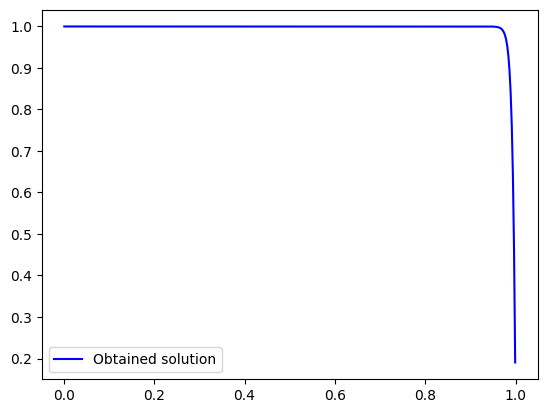

In [287]:
save_animation("plot_with_positive_velocity",solution,t,dt)

In [288]:
u=-200
dt=0.1
nx=400


solution=upwind_solve(dx,dt,nx,u,t,-Nu*T_wall,T0t)
print(solution.shape)

time= 0.0
time= 0.1
time= 0.2
time= 0.30000000000000004
time= 0.4
time= 0.5
time= 0.6000000000000001
time= 0.7000000000000001
time= 0.8
time= 0.9
time= 1.0
time= 1.1
time= 1.2000000000000002
time= 1.3
time= 1.4000000000000001
time= 1.5
time= 1.6
time= 1.7000000000000002
time= 1.8
time= 1.9000000000000001
time= 2.0
time= 2.1
time= 2.2
time= 2.3000000000000003
time= 2.4000000000000004
time= 2.5
time= 2.6
time= 2.7
time= 2.8000000000000003
time= 2.9000000000000004
time= 3.0
time= 3.1
time= 3.2
time= 3.3000000000000003
time= 3.4000000000000004
time= 3.5
time= 3.6
time= 3.7
time= 3.8000000000000003
time= 3.9000000000000004
time= 4.0
(41, 400)


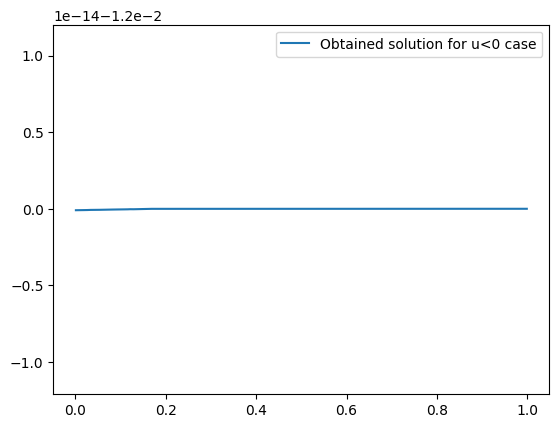

In [289]:
t_0=2
plt.plot(x,solution[int((solution.shape[0]-1)*t_0/t)],label="Obtained solution for u<0 case")
plt.legend()
plt.show()

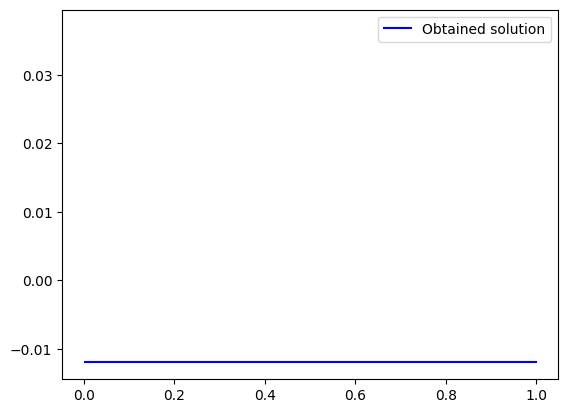

In [290]:
save_animation("plot_with_negative_velocity",solution,t,dt)

### 7. $u=\pm 20$ case

This technique can be good also for $u=\pm20$. The upwind can still be better than, e.g. central differencing, since the Peclet number will still be $Pe=u/1/dx=20*400>>2$